In [2]:
from pyspark.sql import SparkSession 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import ClusteringEvaluator


spark = SparkSession.builder.appName("SparkML Clustering").getOrCreate()
pointsDF= spark.read.option("header","false")\
                        .option("inferSchema","True")\
                        .csv("datasets/points.txt")
pointsDF = pointsDF.withColumnRenamed("_c0","x")
pointsDF = pointsDF.withColumnRenamed("_c1","y")
pointsDF.show()


+---+---+
|  x|  y|
+---+---+
|  5|  5|
|105|107|
|105|106|
|  4|  6|
|  6|  6|
|106|  5|
|  7|  7|
|  3|  8|
|107|107|
|  6|  7|
|  7| 10|
|108|108|
|  8|  6|
|  3|108|
|  5|  8|
|107|106|
|  8|  8|
|100|107|
|107|108|
|108|106|
+---+---+
only showing top 20 rows



In [3]:
vec = VectorAssembler(inputCols=['x','y'],outputCol='features')
pointsDF = vec.transform(pointsDF)
#pointsDF.show()


x = pointsDF.select("x").rdd.flatMap(lambda x : list(x) ).collect()
y = pointsDF.select("y").rdd.flatMap(lambda x : list(x) ).collect()

In [4]:
k = 4
km = KMeans().setK(k)

model = km.fit(pointsDF)

print(model.clusterCenters())

resultDF = model.transform(pointsDF) #Assing points to the centers (Prediction)
pointsDF.show()

[array([ 94.44444444, 107.        ]), array([10000008., 10000006.]), array([5.9, 7.1]), array([106.,   5.])]
+---+---+-------------+
|  x|  y|     features|
+---+---+-------------+
|  5|  5|    [5.0,5.0]|
|105|107|[105.0,107.0]|
|105|106|[105.0,106.0]|
|  4|  6|    [4.0,6.0]|
|  6|  6|    [6.0,6.0]|
|106|  5|  [106.0,5.0]|
|  7|  7|    [7.0,7.0]|
|  3|  8|    [3.0,8.0]|
|107|107|[107.0,107.0]|
|  6|  7|    [6.0,7.0]|
|  7| 10|   [7.0,10.0]|
|108|108|[108.0,108.0]|
|  8|  6|    [8.0,6.0]|
|  3|108|  [3.0,108.0]|
|  5|  8|    [5.0,8.0]|
|107|106|[107.0,106.0]|
|  8|  8|    [8.0,8.0]|
|100|107|[100.0,107.0]|
|107|108|[107.0,108.0]|
|108|106|[108.0,106.0]|
+---+---+-------------+
only showing top 20 rows



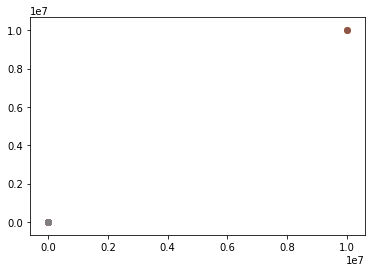

0.9010636765750382


In [5]:
for i in range(k):
    x = resultDF.filter(resultDF['prediction']==i).select("x").rdd.flatMap(lambda x : list(x) ).collect()
    y = resultDF.filter(resultDF['prediction']==i).select("y").rdd.flatMap(lambda x : list(x) ).collect()
    plt.scatter(x,y)

for a in model.clusterCenters():
    plt.scatter(a[0],a[1])

plt.show()

eva = ClusteringEvaluator()
res = eva.evaluate(resultDF)
print(res)